### Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [5]:
df_tv = pd.read_csv('F:/Data Analysis/Python/Disney/tv_shows.csv')

In [6]:
df_tv.head(5)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [7]:
df_tv = df_tv.drop(['Unnamed: 0', 'Type'], axis = 1) 
df_tv.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0


In [9]:
df_tv['IMDb'] = df_tv['IMDb'].str.replace('/10', '', regex=False).astype(float)

# Verify the result
print(df_tv['IMDb'].head())
print(df_tv['IMDb'].dtype)

0    9.4
1    8.7
2    9.0
3    8.8
4    8.8
Name: IMDb, dtype: float64
float64


In [10]:
display(df_tv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5368 non-null   int64  
 1   Title            5368 non-null   object 
 2   Year             5368 non-null   int64  
 3   Age              3241 non-null   object 
 4   IMDb             4406 non-null   float64
 5   Rotten Tomatoes  5368 non-null   object 
 6   Netflix          5368 non-null   int64  
 7   Hulu             5368 non-null   int64  
 8   Prime Video      5368 non-null   int64  
 9   Disney+          5368 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 419.5+ KB


None

In [11]:
duplicates = df_tv.duplicated(subset='Title', keep = False)
duplicated_values = df_tv[duplicates].sort_values('Title')
display(duplicated_values.head())

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+


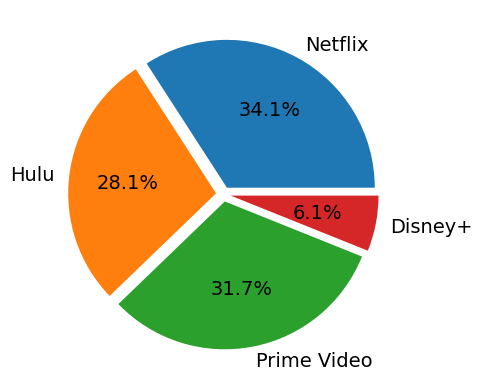

Netflix offers 1971 TV Shows
Hulu offers 1621 TV Shows
Prime offers 1831 TV Shows
Disney+ offers 351 TV Shows


In [12]:
netflix_sum = df_tv['Netflix'].sum()
hulu_sum = df_tv['Hulu'].sum()
prime_sum = df_tv['Prime Video'].sum()
disney_sum = df_tv['Disney+'].sum()

market = [netflix_sum, hulu_sum, prime_sum, disney_sum]
labels = ('Netflix', 'Hulu', 'Prime Video', 'Disney+')
sep = (0.05, 0.05, 0.05, 0.05)

fig, ax = plt.subplots()

ax.pie(market, explode=sep, labels=labels, autopct='%.1f%%', radius=1, textprops={'fontsize': 14})

plt.show()

print('Netflix offers ' + str(netflix_sum) + ' TV Shows')
print('Hulu offers ' + str(hulu_sum) + ' TV Shows')
print('Prime offers ' + str(prime_sum) + ' TV Shows')
print('Disney+ offers ' + str(disney_sum) + ' TV Shows')


### Create Dataframe for each platform

In [13]:
netflix_shows = df_tv.loc[df_tv["Netflix"] == 1].drop(['Hulu', 'Prime Video', 'Disney+'], axis = 1)

hulu_shows = df_tv.loc[df_tv["Hulu"] == 1].drop(['Netflix', 'Prime Video', 'Disney+'], axis = 1)

prime_shows = df_tv.loc[df_tv["Prime Video"] == 1].drop(['Hulu', 'Netflix', 'Disney+'], axis = 1)

disney_shows = df_tv.loc[df_tv["Disney+"] == 1].drop(['Hulu', 'Prime Video', 'Netflix'], axis = 1)

### Who offers most highly rated TV Shows?

In [14]:
# Filter shows with IMDb > 8
top_netflix_shows = netflix_shows['IMDb'] > 8
top_hulu_shows = hulu_shows['IMDb'] > 8
top_prime_shows = prime_shows['IMDb'] > 8
top_disney_shows = disney_shows['IMDb'] > 8

# Create summary DataFrame
top_rated_shows = pd.DataFrame({
    'Platforms': ['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'Total Highly Rated Shows': [
        top_netflix_shows.sum(),
        top_hulu_shows.sum(),
        top_prime_shows.sum(),
        top_disney_shows.sum()
    ]
})


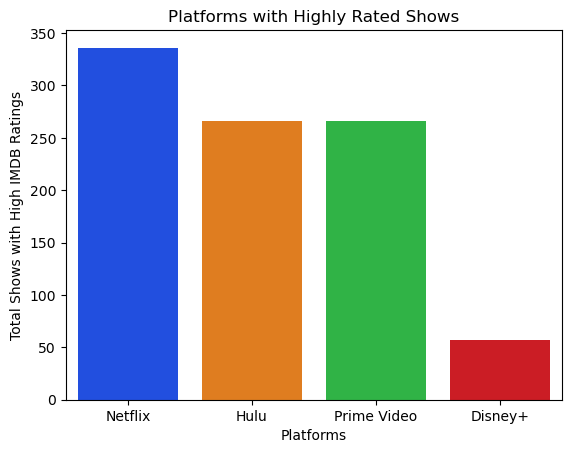

,Total Highly Rated Shows
Platforms,
Netflix,336
Hulu,266
Prime Video,266
Disney+,57


In [15]:
sns.barplot(x = top_rated_shows['Platforms'], y = top_rated_shows['Total Highly Rated Shows'], data = top_rated_shows, palette = 'bright' )

plt.xlabel('Platforms')
plt.ylabel('Total Shows with High IMDB Ratings')
plt.title('Platforms with Highly Rated Shows')
plt.show()

top_rated_shows = top_rated_shows.set_index('Platforms')
display(top_rated_shows)

### Which platform is most consistent with Quality?

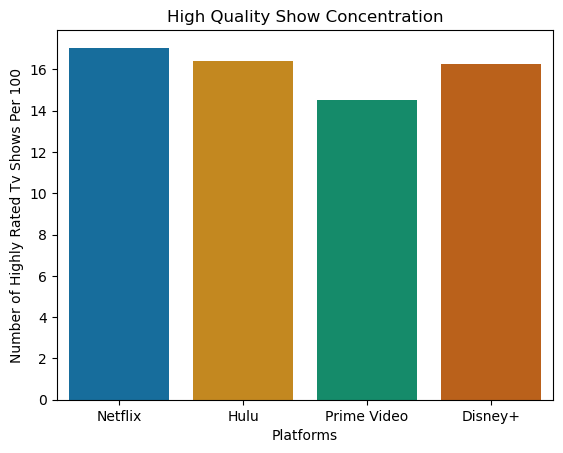

Netflix proides on average 17 high quality tv-shows out of every 100 tv-shows
Hulu proides on average 16 high quality tv-shows out of every 100 tv-shows
Prime Video proides on average 15 high quality tv-shows out of every 100 tv-shows
Disney+ proides on average 16 high quality tv-shows out of every 100 tv-shows


In [18]:
ratio_netflix = (top_netflix_shows.sum() / netflix_sum * 100)
ratio_hulu = (top_hulu_shows.sum() / hulu_sum * 100)
ratio_prime = (top_prime_shows.sum() / prime_sum * 100)
ratio_disney = (top_disney_shows.sum() / disney_sum * 100)

top_rated_ratios = ({
    'platforms' : ['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'ratios' : [ratio_netflix, ratio_hulu, ratio_prime, ratio_disney]
})

sns.barplot(x = top_rated_ratios['platforms'], y = top_rated_ratios['ratios'], palette = 'colorblind')

plt.xlabel('Platforms')
plt.ylabel('Number of Highly Rated Tv Shows Per 100')
plt.title('High Quality Show Concentration')

plt.show()

print('Netflix proides on average ' + str(int(round(ratio_netflix))) + ' high quality tv-shows out of every 100 tv-shows')
print('Hulu proides on average ' + str(int(round(ratio_hulu))) + ' high quality tv-shows out of every 100 tv-shows')
print('Prime Video proides on average ' + str(int(round(ratio_prime))) + ' high quality tv-shows out of every 100 tv-shows')
print('Disney+ proides on average ' + str(int(round(ratio_disney))) + ' high quality tv-shows out of every 100 tv-shows')

### Best TV Shows For Each Streaming Platform

Text(0.5, 1.0, 'Highest rated Netflix Shows')

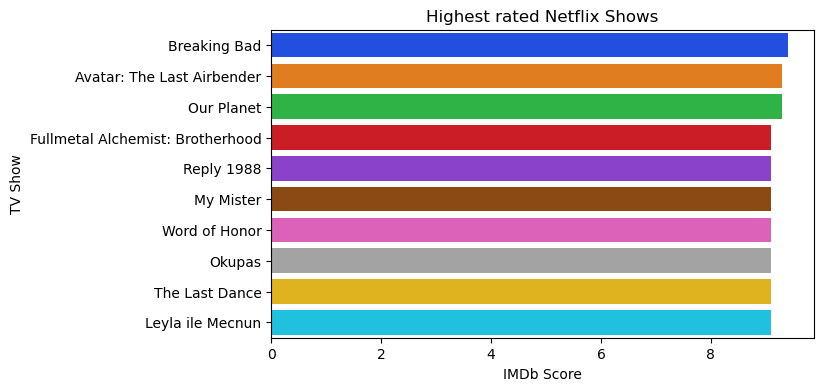

In [19]:
netflix_top10 = netflix_shows.sort_values(by = 'IMDb', ascending = False).head(10)
plt.figure(figsize = (7,4))
sns.barplot(x = 'IMDb', y = 'Title', data = netflix_top10, palette = 'bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest rated Netflix Shows')

Text(0.5, 1.0, 'Highest rated Hulu Shows')

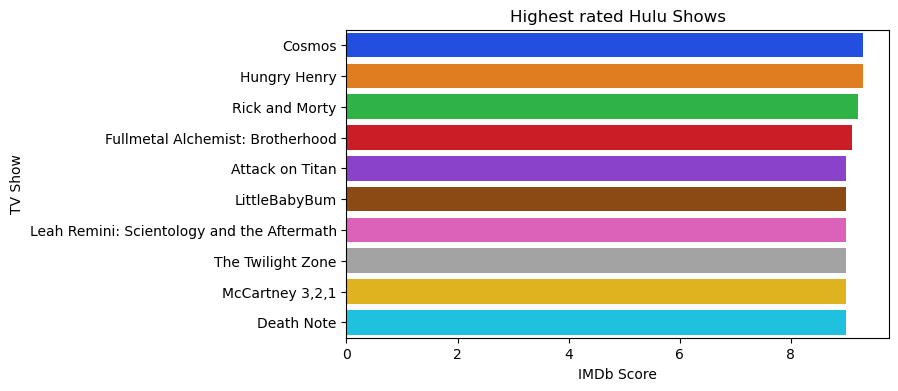

In [21]:
hulu_top10 = hulu_shows.sort_values(by = 'IMDb', ascending = False).head(10)
plt.figure(figsize = (7,4))
sns.barplot(x = 'IMDb', y = 'Title', data = hulu_top10, palette = 'bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest rated Hulu Shows')

Text(0.5, 1.0, 'Highest rated Prime Video Shows')

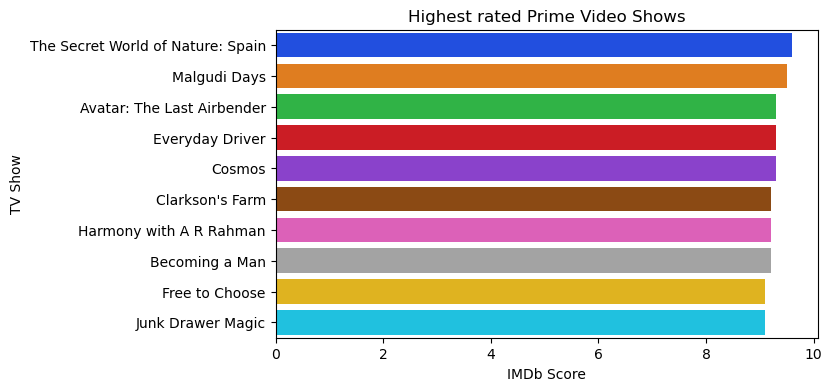

In [22]:
prime_top10 = prime_shows.sort_values(by = 'IMDb', ascending = False).head(10)
plt.figure(figsize = (7,4))
sns.barplot(x = 'IMDb', y = 'Title', data = prime_top10, palette = 'bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest rated Prime Video Shows')

Text(0.5, 1.0, 'Highest rated Disney+ Shows')

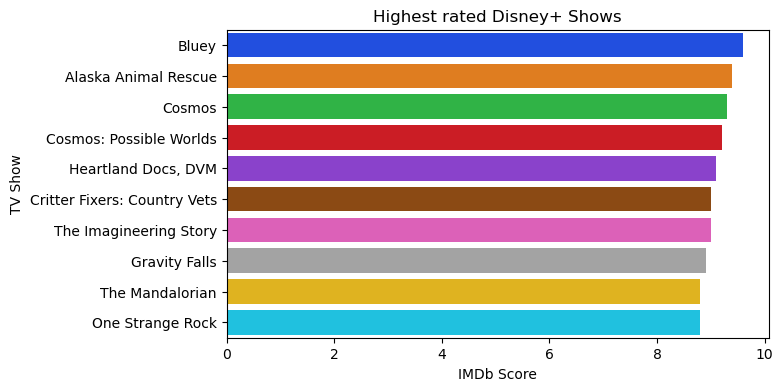

In [23]:
disney_top10 = disney_shows.sort_values(by = 'IMDb', ascending = False).head(10)
plt.figure(figsize = (7,4))
sns.barplot(x = 'IMDb', y = 'Title', data = disney_top10, palette = 'bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest rated Disney+ Shows')

### Who owns the current highest rated TV Shows?

F:\DSP\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

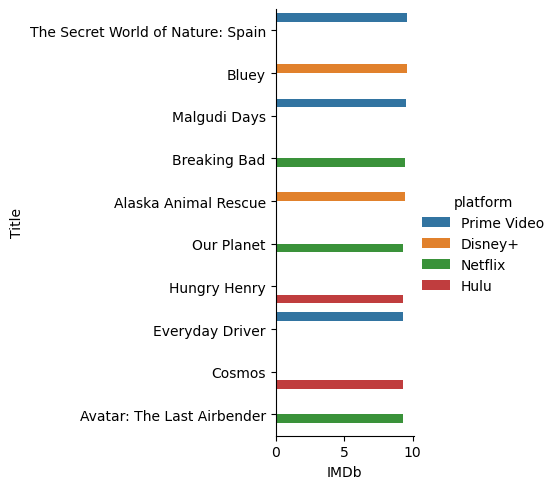

In [27]:
df_tv['platform'] = df_tv[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].idxmax(axis=1)
top_10 = df_tv.sort_values(by='IMDb', ascending=False).head(10)
                           
plt.figure(figsize=(8,8))
sns.catplot(x = 'IMDb', y='Title', data = top_10, hue='platform', kind='bar')
plt.show()

### Best platform for Children

In [28]:
print(df_tv.Age.unique())

['18+' '16+' '7+' 'all' nan '13+']


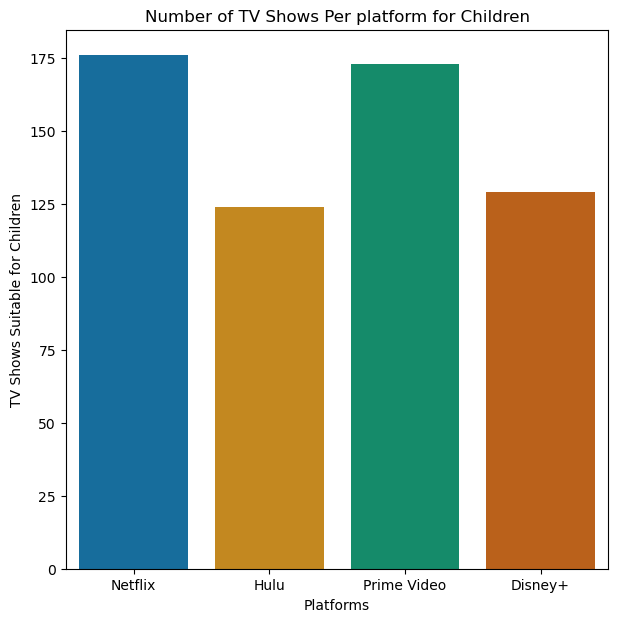

Netflix has 176 TV Shows for Children
Hulu has 124 TV Shows for Children
Prime has 173 TV Shows for Children
Disney+ has 129 TV Shows for Children


In [31]:
netflix_children = netflix_shows[netflix_shows['Age'] == 'all']
hulu_children = hulu_shows[hulu_shows['Age'] == 'all']
prime_children = prime_shows[prime_shows['Age'] == 'all']
disney_children = disney_shows[disney_shows['Age'] == 'all']

netflix = len(netflix_children['Title'])
hulu = len(hulu_children['Title'])
prime = len(prime_children['Title'])
disney = len(disney_children['Title'])

children_sum = ({
    'platforms' : ['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'sums' : [netflix, hulu, prime, disney]
})

plt.figure(figsize=(7, 7))

sns.barplot(x = children_sum['platforms'],
           y = children_sum['sums'],
           palette = 'colorblind')

plt.xlabel('Platforms')
plt.ylabel('TV Shows Suitable for Children')
plt.title('Number of TV Shows Per platform for Children')

plt.show()

print('Netflix has ' + str(netflix) + ' TV Shows for Children')
print('Hulu has ' + str(hulu) + ' TV Shows for Children')
print('Prime has ' + str(prime) + ' TV Shows for Children')
print('Disney+ has ' + str(disney) + ' TV Shows for Children')

### Which platform has the highest concentration of TV Shows for Children?

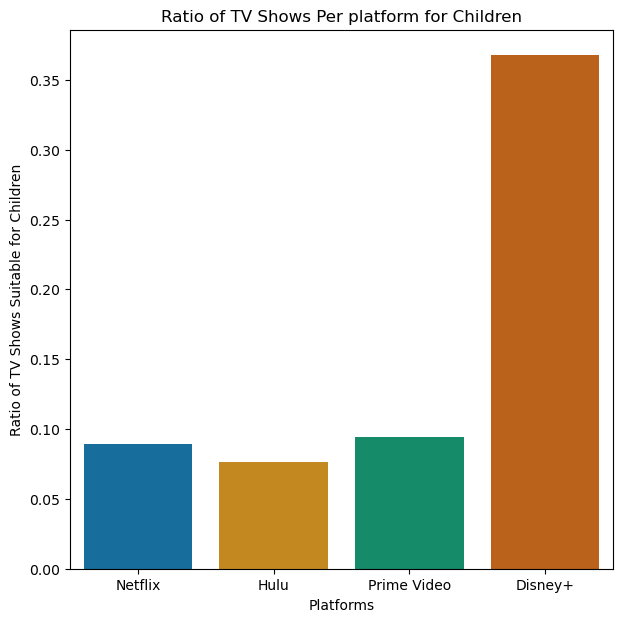

In [39]:
ratio_netflix_children = netflix / netflix_sum
ratio_hulu_children = hulu / hulu_sum
ratio_prime_children = prime / prime_sum
ratio_disney_children = disney / disney_sum

children_shows_ratios = ({
    'platforms' : ['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'ratios' : [ratio_netflix_children, ratio_hulu_children, ratio_prime_children, ratio_disney_children]
})

plt.figure(figsize=(7, 7))

sns.barplot(x = children_shows_ratios['platforms'],
           y = children_shows_ratios['ratios'],
           palette = 'colorblind')

plt.xlabel('Platforms')
plt.ylabel('Ratio of TV Shows Suitable for Children')
plt.title('Ratio of TV Shows Per platform for Children')

plt.show()
